In [1]:
from astropy.io import fits
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib import ticker
from matplotlib import colors

import warnings
warnings.filterwarnings('ignore')

full_sky = 4 * np.pi * (180 / np.pi) ** 2
f_sky = 137. / (full_sky)
fid = 0.82 * np.sqrt((0.233+0.046)/0.3)
ntomo = 4
npair = ntomo * (ntomo + 1) // 2

# Load reconstructed $C_\ell$ from TPCF and PCL

In [2]:
bc = fits.getdata('../data/ell.fits')
w = (bc > 400) & (bc < 1800) # scale cut in ell space

# shape of reconstruction is (number of mocks x number of tomo pairs x number of data points)
cl_pcl = fits.getdata('../data/pcltocl_final_hscy1.fits')[:, :, w]
cl_pcl_mean = np.mean(cl_pcl, axis=0)
cl_pcl_dv = cl_pcl.reshape(cl_pcl.shape[0], -1)
cov_pcl = np.cov(cl_pcl_dv, rowvar=False)
cor_pcl = np.corrcoef(cl_pcl_dv, rowvar=False)

cl_xi = fits.getdata('../data/xitocl_final_hscy1.fits')[:, :, w]
cl_xi_mean = np.mean(cl_xi, axis=0)
cl_xi_dv = cl_xi.reshape(cl_xi.shape[0], -1)
cov_xi = np.cov(cl_xi_dv, rowvar=False)
cor_xi = np.corrcoef(cl_xi_dv, rowvar=False)

N = cl_pcl.shape[0]

# Define useful mappings

In [3]:
# possible bin pairs (e.g. (0, 0), (2, 3))
bp = list(itertools.combinations_with_replacement(range(ntomo), 2))
print('bp', bp)

# index to bin-pair (e.g. 0 -> (0, 0), 3 -> (0, 3))
did = {i: pair for i, pair in enumerate(bp)}

# bin-pair to index
iid = {value:key for key, value in did.items()}

# index to cov index
ind = np.arange(w.sum() * npair).reshape(npair, w.sum())
ind = {i: ind[i] for i in range(npair)}

bp [(0, 0), (0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]


# Plot correlation and cross-correlation

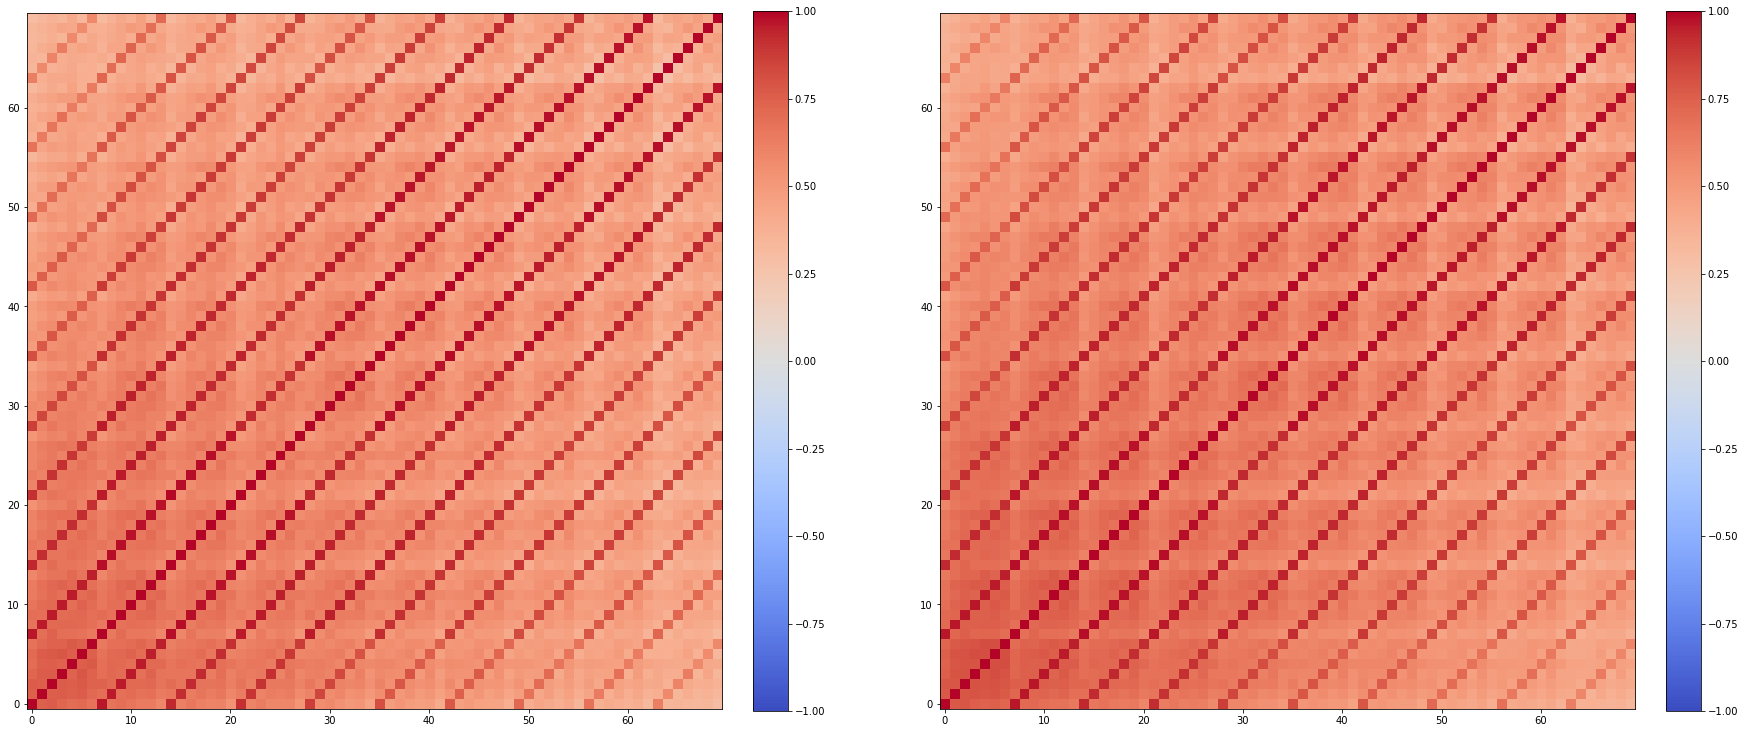

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30, 30))
im1 = axs[0].imshow(cor_pcl, origin='lower', cmap='coolwarm', vmax=1., vmin=-1.)
im2 = axs[1].imshow(cor_xi, origin='lower', cmap='coolwarm', vmax=1., vmin=-1.)
plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)
plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)
# https://stackoverflow.com/questions/18195758/set-matplotlib-colorbar-size-to-match-graph

In [5]:
xticks_labels = [r'$C_{\ell, F}^{0, 0}$',
                 r'$C_{\ell, F}^{0, 1}$',
                 r'$C_{\ell, F}^{0, 2}$',
                 r'$C_{\ell, F}^{0, 3}$',
                 r'$C_{\ell, F}^{1, 1}$',
                 r'$C_{\ell, F}^{1, 2}$',
                 r'$C_{\ell, F}^{1, 3}$',
                 r'$C_{\ell, F}^{2, 2}$',
                 r'$C_{\ell, F}^{2, 3}$',
                 r'$C_{\ell, F}^{3, 3}$',
                 r'$C_{\ell, F}^{0, 0}$',
                 r'$C_{\ell, F}^{0, 1}$',
                 r'$C_{\ell, F}^{0, 2}$',
                 r'$C_{\ell, F}^{0, 3}$',
                 r'$C_{\ell, F}^{1, 1}$',
                 r'$C_{\ell, F}^{1, 2}$',
                 r'$C_{\ell, F}^{1, 3}$',
                 r'$C_{\ell, F}^{2, 2}$',
                 r'$C_{\ell, F}^{2, 3}$',
                 r'$C_{\ell, F}^{3, 3}$',
                ] 
xTticks_labels = [r'$C_{\ell, F}^{0, 0}$',
                 r'$C_{\ell, F}^{0, 1}$',
                 r'$C_{\ell, F}^{0, 2}$',
                 r'$C_{\ell, F}^{0, 3}$',
                 r'$C_{\ell, F}^{1, 1}$',
                 r'$C_{\ell, F}^{1, 2}$',
                 r'$C_{\ell, F}^{1, 3}$',
                 r'$C_{\ell, F}^{2, 2}$',
                 r'$C_{\ell, F}^{2, 3}$',
                 r'$C_{\ell, F}^{3, 3}$',
                 r'$C_{\ell, R}^{0, 0}$',
                 r'$C_{\ell, R}^{0, 1}$',
                 r'$C_{\ell, R}^{0, 2}$',
                 r'$C_{\ell, R}^{0, 3}$',
                 r'$C_{\ell, R}^{1, 1}$',
                 r'$C_{\ell, R}^{1, 2}$',
                 r'$C_{\ell, R}^{1, 3}$',
                 r'$C_{\ell, R}^{2, 2}$',
                 r'$C_{\ell, R}^{2, 3}$',
                 r'$C_{\ell, R}^{3, 3}$',
                ] 
yticks_labels = [r'$C_{\ell, F}^{0, 0}$',
                 r'$C_{\ell, F}^{0, 1}$',
                 r'$C_{\ell, F}^{0, 2}$',
                 r'$C_{\ell, F}^{0, 3}$',
                 r'$C_{\ell, F}^{1, 1}$',
                 r'$C_{\ell, F}^{1, 2}$',
                 r'$C_{\ell, F}^{1, 3}$',
                 r'$C_{\ell, F}^{2, 2}$',
                 r'$C_{\ell, F}^{2, 3}$',
                 r'$C_{\ell, F}^{3, 3}$',
                 r'$C_{\ell, R}^{0, 0}$',
                 r'$C_{\ell, R}^{0, 1}$',
                 r'$C_{\ell, R}^{0, 2}$',
                 r'$C_{\ell, R}^{0, 3}$',
                 r'$C_{\ell, R}^{1, 1}$',
                 r'$C_{\ell, R}^{1, 2}$',
                 r'$C_{\ell, R}^{1, 3}$',
                 r'$C_{\ell, R}^{2, 2}$',
                 r'$C_{\ell, R}^{2, 3}$',
                 r'$C_{\ell, R}^{3, 3}$',
                ] 
yRticks_labels = [r'$C_{\ell, R}^{0, 0}$',
                 r'$C_{\ell, R}^{0, 1}$',
                 r'$C_{\ell, R}^{0, 2}$',
                 r'$C_{\ell, R}^{0, 3}$',
                 r'$C_{\ell, R}^{1, 1}$',
                 r'$C_{\ell, R}^{1, 2}$',
                 r'$C_{\ell, R}^{1, 3}$',
                 r'$C_{\ell, R}^{2, 2}$',
                 r'$C_{\ell, R}^{2, 3}$',
                 r'$C_{\ell, R}^{3, 3}$',
                 r'$C_{\ell, R}^{0, 0}$',
                 r'$C_{\ell, R}^{0, 1}$',
                 r'$C_{\ell, R}^{0, 2}$',
                 r'$C_{\ell, R}^{0, 3}$',
                 r'$C_{\ell, R}^{1, 1}$',
                 r'$C_{\ell, R}^{1, 2}$',
                 r'$C_{\ell, R}^{1, 3}$',
                 r'$C_{\ell, R}^{2, 2}$',
                 r'$C_{\ell, R}^{2, 3}$',
                 r'$C_{\ell, R}^{3, 3}$',
                ] 

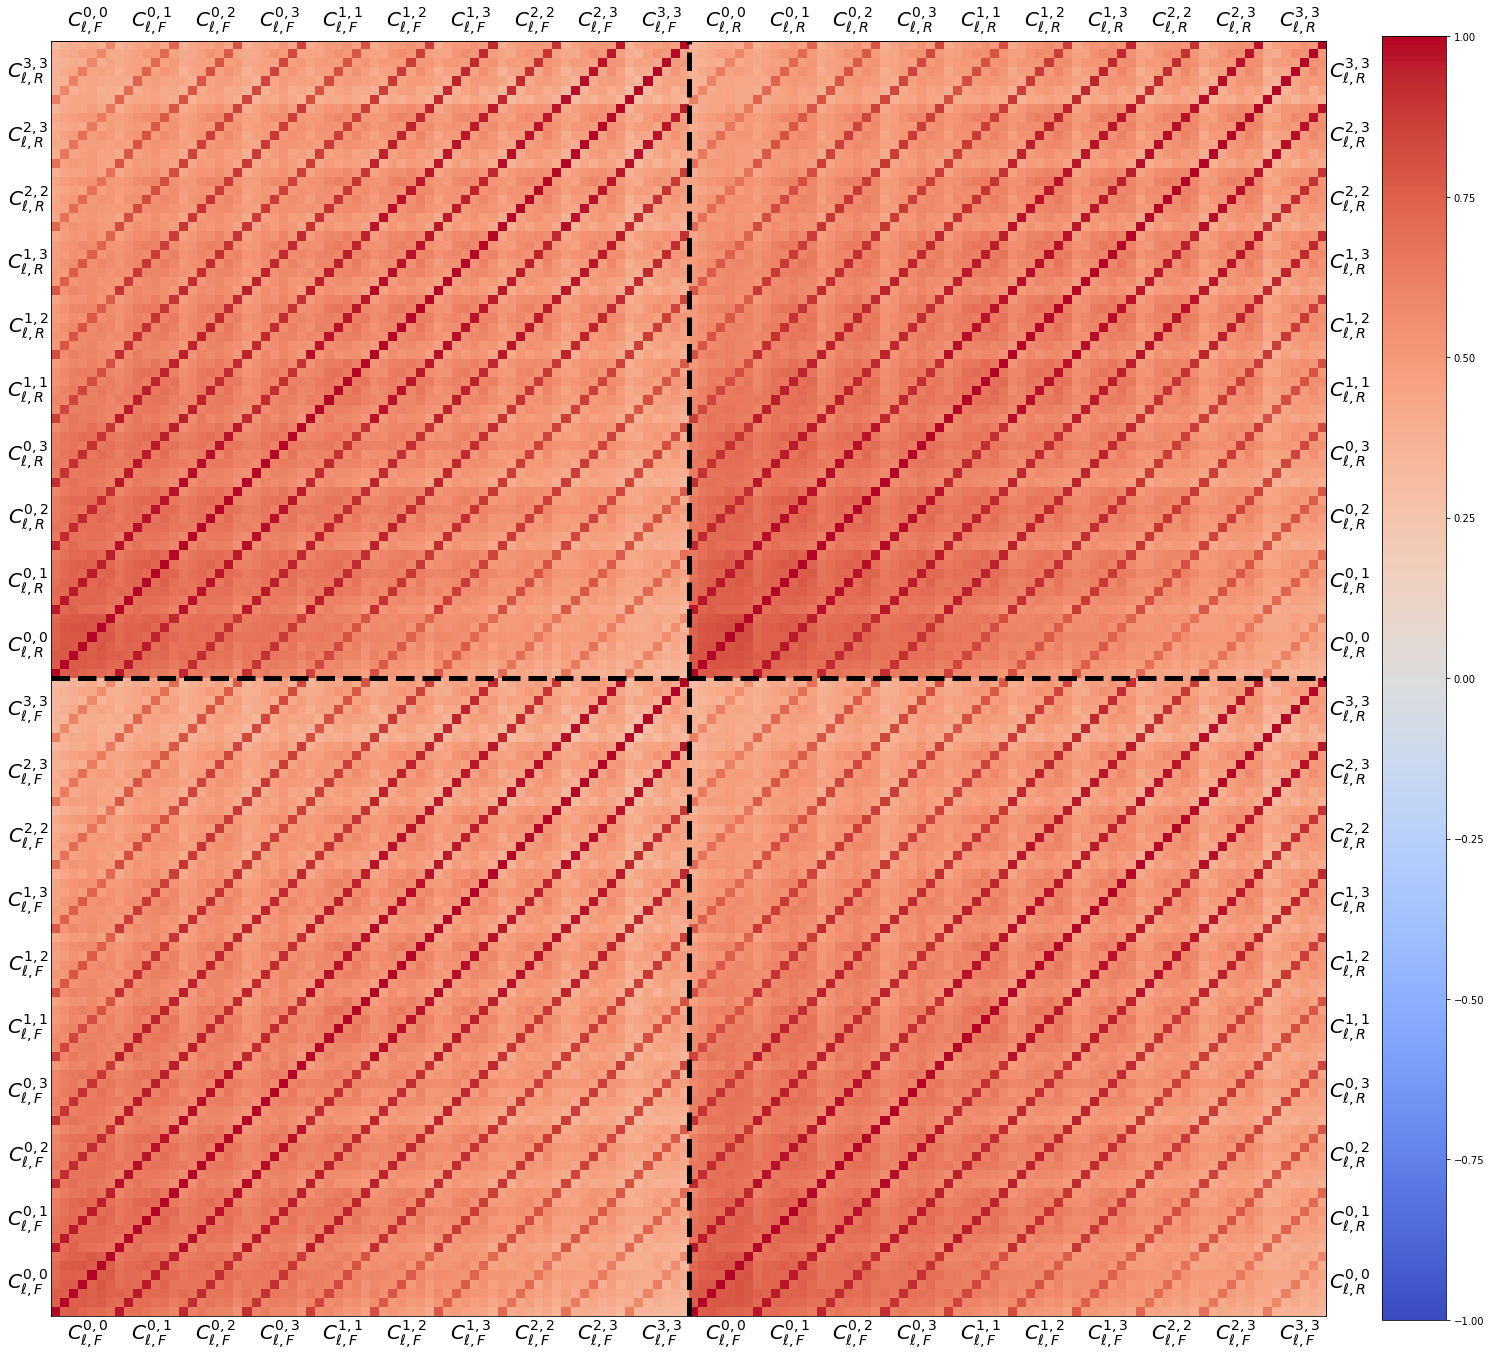

In [6]:
cross_corr = np.corrcoef(cl_pcl_dv, cl_xi_dv, rowvar=False)
fig, ax = plt.subplots(1, 1, figsize=(25, 25))
cross_corr_im = ax.imshow(cross_corr, origin='lower', cmap='coolwarm', vmin=-1., vmax=1.)
axT = ax.secondary_xaxis('top')
axR = ax.secondary_yaxis('right')
plt.colorbar(cross_corr_im, ax=ax, fraction=0.046, pad=0.04)
ax.axvline(x=w.sum()*npair-0.5, c='black', linewidth=5, ls='--')
ax.axhline(y=w.sum()*npair-0.5, c='black', linewidth=5, ls='--')
ax.tick_params(axis='both', pad=3, length=0)
axR.tick_params(axis='y', pad=3, length=0)
axT.tick_params(axis='x', pad=3, length=0)
ax.set_xticks(ticks=np.arange(w.sum()/2, w.sum()*npair*2, w.sum()), labels=xticks_labels, fontsize=20);
ax.set_yticks(ticks=np.arange(w.sum()/2, w.sum()*npair*2, w.sum()), labels=yticks_labels, fontsize=20);
axT.set_xticks(ticks=np.arange(w.sum()/2, w.sum()*npair*2, w.sum()), labels=xTticks_labels, fontsize=20);
axR.set_yticks(ticks=np.arange(w.sum()/2, w.sum()*npair*2, w.sum()), labels=yRticks_labels, fontsize=20);

# Add shape noise

In [7]:
def _shape_noise_cov_block(cl, i, j, m, n, sn, size):
    cov = np.zeros(size)
    if j == n:
        cov += cl[ind[iid[(i, m)]]] * sn[j]
    if i == m:
        cov += cl[ind[iid[(j, n)]]] * sn[i]
    if i == m and j == n:
        cov += sn[i] * sn[j]
    if j == m:
        cov += cl[ind[iid[(i, n)]]] * sn[j]
    if i == n:
        cov += cl[ind[iid[(j, m)]]] * sn[i]
    if i == n and j == m:
        cov += sn[i] * sn[j]
    return np.diag(cov)

def shape_noise_cov(cl, sn, size, norm):
    cov = np.zeros((10 * size, 10 * size))
    for row in range(10):
        for col in range(row, 10):
            i, j = did[row]
            m, n = did[col]
            cov[row*w.sum():(row+1)*w.sum(), col*w.sum():(col+1)*w.sum()] = _shape_noise_cov_block(cl, i, j, m, n, sn, size) * norm
    return cov

In [8]:
cl_pcl_mean_dv = cl_pcl_mean.reshape(-1)
cl_xi_mean_dv = cl_xi_mean.reshape(-1)

sigma_e = 0.25
dim = (60 * 180 / np.pi) ** 2 # armic^2/steradian
n_eff = np.array([3.77, 5.07, 4.00, 2.12]) # per arcmin^2
n_eff *= dim # per steradian

shape_noise =  sigma_e ** 2 / 2. / n_eff
SN_cov_norm = 4 * np.pi / (f_sky * (2 * bc[w] + 1) * np.gradient(bc[w]))

SN_cov_pcl = shape_noise_cov(cl_pcl_mean_dv, shape_noise, w.sum(), SN_cov_norm)
SN_cov_pcl = SN_cov_pcl + SN_cov_pcl.T - np.diag(np.diag(SN_cov_pcl))

SN_cov_xi = shape_noise_cov(cl_xi_mean_dv, shape_noise, w.sum(), SN_cov_norm)
SN_cov_xi = SN_cov_xi + SN_cov_xi.T - np.diag(np.diag(SN_cov_xi))

new_cov_pcl = cov_pcl + SN_cov_pcl
new_cov_xi = cov_xi + SN_cov_xi

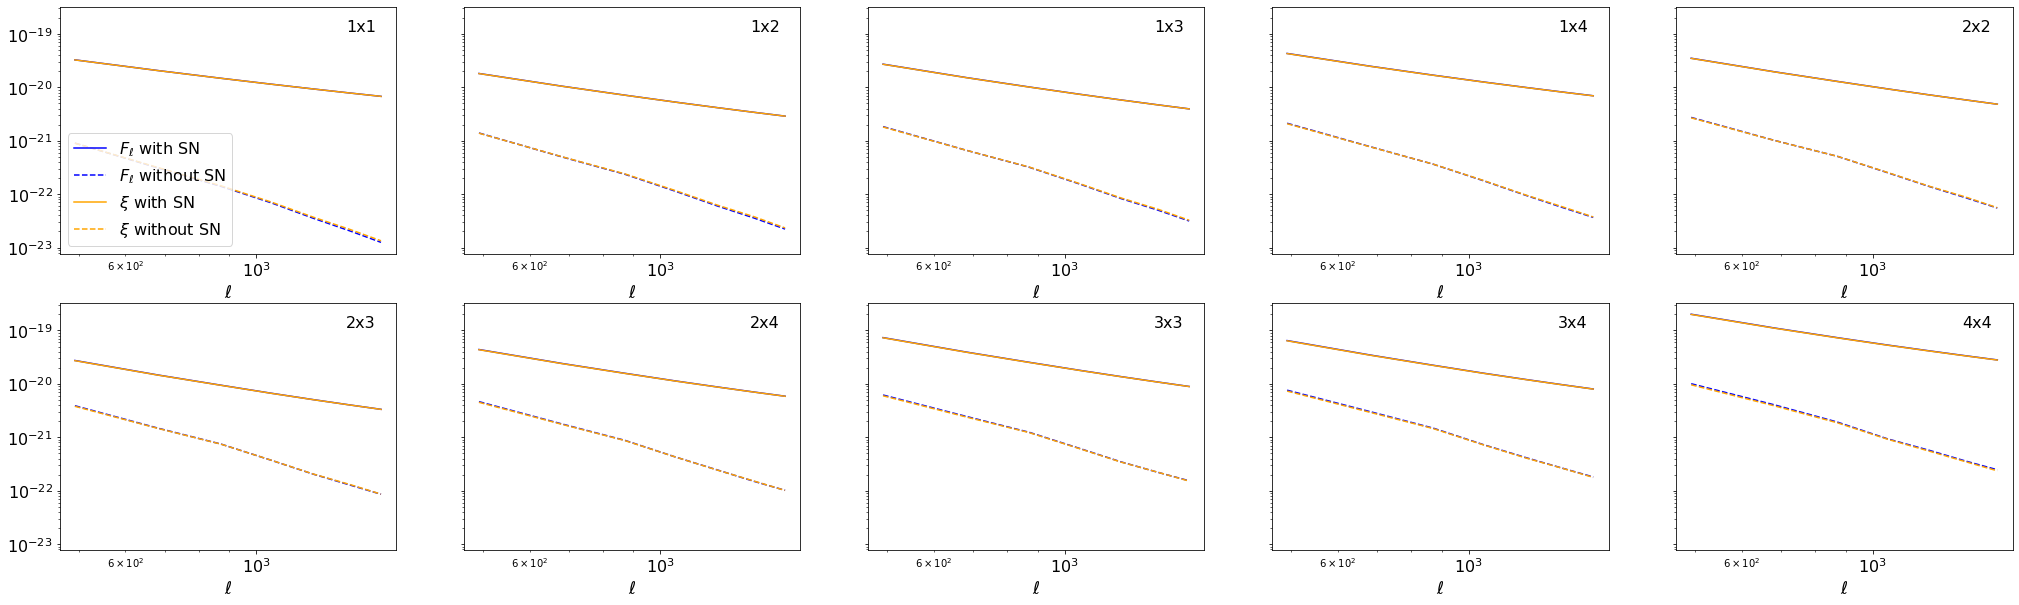

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(35, 10), sharey=True)
axs = axs.flatten()
for b in range(10):
    axs[b].loglog(bc[w], np.diag(new_cov_pcl[ind[b], :][:, ind[b]]), c='blue', label=r'$F_\ell$ with SN')
    axs[b].loglog(bc[w], np.diag(cov_pcl[ind[b], :][:, ind[b]]), ls='--', c='blue', label=r'$F_\ell$ without SN')
    axs[b].loglog(bc[w], np.diag(new_cov_xi[ind[b], :][:, ind[b]]), c='orange', label=r'$\xi$ with SN')
    axs[b].loglog(bc[w], np.diag(cov_xi[ind[b], :][:, ind[b]]), ls='--', c='orange', label=r'$\xi$ without SN')
    axs[b].tick_params(axis='both', which='major', labelsize=16)
    i, j = did[b]
    axs[b].text(0.85, 0.90, f'{i+1}x{j+1}', transform=axs[b].transAxes, fontsize=16)
    if b == 0:
        axs[b].legend(fontsize=16, loc='lower left')
    axs[b].set_xlabel(r'$\ell$', fontsize=17)